## 数据导入

导入原始数据：

In [1]:
import pandas as pd
import numpy as np

df_data = pd.read_csv("data.csv")
df_label = pd.read_csv("label.csv")

看一眼数据：

In [2]:
df_data.head()

,AGE,AST,AST_PCT,AST_PCT_RANK,AST_RANK,AST_RATIO,AST_RATIO_RANK,AST_TO,AST_TO_RANK,BLK,...,TOV,TOV_RANK,TS_PCT,TS_PCT_RANK,USG_PCT,USG_PCT_RANK,W,W_PCT,W_PCT_RANK,W_RANK
0,30.0,2.4,0.127,164,103,10.7,254,1.05,203,0.0,...,2.3,63,0.544,90,0.262,27,16,0.571,145,61
1,26.0,4.7,0.234,65,32,14.0,187,1.46,128,0.3,...,3.2,13,0.489,232,0.319,2,18,0.692,47,31
2,34.0,2.6,0.127,165,93,14.6,170,1.23,175,0.3,...,2.1,71,0.543,92,0.187,187,15,0.517,195,73
3,32.0,1.5,0.067,285,164,8.6,303,0.78,255,2.2,...,1.9,94,0.490,229,0.190,170,14,0.519,189,104
4,26.0,1.9,0.099,212,131,8.0,310,0.70,270,1.2,...,2.6,41,0.550,78,0.275,18,14,0.519,189,104


In [3]:
df_label.head()

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
0,275,1.610613e+09,Allan Houston,1.0,2000
1,947,1.610613e+09,Allen Iverson,1.0,2000
2,193,1.610613e+09,Anthony Mason,1.0,2000
3,213,1.610613e+09,Antonio Davis,1.0,2000
4,686,1.610613e+09,Antonio McDyess,1.0,2000


其中，`YEAR=2000`表示当前为2000-01赛季。`ALL_STAR=1`表示当季是全明星，`ALL_STAR=0`表示不是。

为了方便，可以对数据进行归一化，得到零均值单位方差的新数据：

In [4]:
df_data_norm = (df_data - df_data.mean()) / (df_data.std() +np.spacing(0))

我们将2000-2016年的已知数据作为训练集，而将17年的数据作为测试集：

In [5]:
df_data_train = df_data.loc[df_label.YEAR < 2017]
df_data_test = df_data.loc[df_label.YEAR == 2017]

df_data_norm_train = df_data_norm.loc[df_label.YEAR < 2017]
df_data_norm_test = df_data_norm.loc[df_label.YEAR == 2017]

df_label_test = df_label.loc[df_label.YEAR == 2017]
df_label_train = df_label.loc[df_label.YEAR < 2017]

## 统计结果

00-01赛季到16-17赛季，全明星总人次：

In [6]:
sum(df_label_train.ALL_STAR)

396.0

有统计数据的球员总人次：

In [7]:
len(df_label_train)

6850

占比示意图：

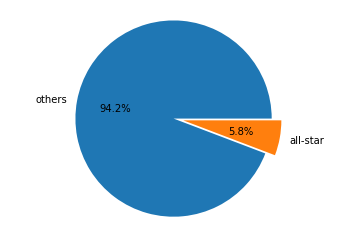

In [8]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.pie([len(df_label_train) - sum(df_label_train.ALL_STAR), sum(df_label_train.ALL_STAR)], 
        explode=(0, 0.1), labels=["others", "all-star"], autopct='%1.1f%%',)
plt.axis("equal")
plt.show()

球员总数：

In [9]:
len(set(df_label_train.PLAYER_ID))

1475

全明星球员数：

In [10]:
len(set(df_label_train.PLAYER_ID.loc[df_label_train.ALL_STAR==1]))

118

占比：

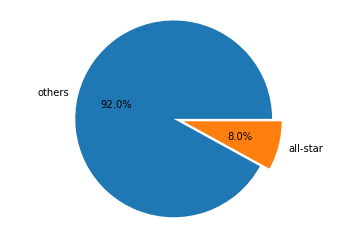

In [11]:
plt.pie([len(set(df_label_train.PLAYER_ID)) - len(set(df_label_train.PLAYER_ID.loc[df_label_train.ALL_STAR==1])),
         len(set(df_label_train.PLAYER_ID.loc[df_label_train.ALL_STAR==1]))], 
        explode=(0, 0.1), labels=["others", "all-star"], autopct='%1.1f%%',)
plt.axis("equal")
plt.show()

参加全明星次数：

In [12]:
from collections import Counter

allstar_times = Counter(df_label_train.PLAYER_NAME.loc[df_label_train.ALL_STAR==1])

allstar_times.most_common(10)

[('Tim Duncan', 13),
 ('LeBron James', 13),
 ('Kobe Bryant', 13),
 ('Dirk Nowitzki', 13),
 ('Dwyane Wade', 11),
 ('Kevin Garnett', 11),
 ('Carmelo Anthony', 10),
 ('Chris Bosh', 9),
 ('Ray Allen', 9),
 ('Paul Pierce', 9)]

## SVM

In [13]:
from sklearn import svm

svm训练及预测，这里需要用归一化的数据：

In [14]:
svm_predict = svm.SVC().fit(df_data_norm_train, 
                            df_label_train.ALL_STAR).predict(df_data_norm_test)

选中了21位：

In [15]:
sum(svm_predict)

21.0

分别是：

In [16]:
df_label_test.iloc[svm_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
6873,203076,1.610613e+09,Anthony Davis,0.0,2017
6891,203078,1.610613e+09,Bradley Beal,0.0,2017
6913,101108,1.610613e+09,Chris Paul,0.0,2017
6926,203081,1.610613e+09,Damian Lillard,0.0,2017
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017
6948,202326,1.610613e+09,DeMarcus Cousins,0.0,2017
7001,203507,1.610613e+09,Giannis Antetokounmpo,0.0,2017
7040,201935,1.610613e+09,James Harden,0.0,2017
7061,202710,1.610613e+09,Jimmy Butler,0.0,2017
7069,203954,1.610613e+09,Joel Embiid,0.0,2017


### KNN

In [17]:
from sklearn import neighbors

预测，这里需要用归一化的数据：

In [18]:
knn_predict = neighbors.KNeighborsClassifier(n_neighbors=1).fit(df_data_norm_train, 
                                                                df_label_train.ALL_STAR).predict(df_data_norm_test)

选中了：

In [19]:
sum(knn_predict)

26.0

In [20]:
df_label_test.iloc[knn_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
6885,201933,1.610613e+09,Blake Griffin,0.0,2017
6921,1626156,1.610613e+09,D'Angelo Russell,0.0,2017
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017
6948,202326,1.610613e+09,DeMarcus Cousins,0.0,2017
6953,203471,1.610613e+09,Dennis Schroder,0.0,2017
6961,1626164,1.610613e+09,Devin Booker,0.0,2017
6973,203110,1.610613e+09,Draymond Green,0.0,2017
7001,203507,1.610613e+09,Giannis Antetokounmpo,0.0,2017
7040,201935,1.610613e+09,James Harden,0.0,2017
7061,202710,1.610613e+09,Jimmy Butler,0.0,2017


如果使用原始特征：

In [21]:
knn_predict = neighbors.KNeighborsClassifier(n_neighbors=1).fit(df_data_train, 
                                                                df_label_train.ALL_STAR).predict(df_data_test)

选中了：

In [22]:
sum(knn_predict)

26.0

选中的人会有所变化：

In [23]:
df_label_test.iloc[knn_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
6885,201933,1.610613e+09,Blake Griffin,0.0,2017
6891,203078,1.610613e+09,Bradley Beal,0.0,2017
6931,201568,1.610613e+09,Danilo Gallinari,0.0,2017
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017
6948,202326,1.610613e+09,DeMarcus Cousins,0.0,2017
6961,1626164,1.610613e+09,Devin Booker,0.0,2017
6973,203110,1.610613e+09,Draymond Green,0.0,2017
6984,202339,1.610613e+09,Eric Bledsoe,0.0,2017
7001,203507,1.610613e+09,Giannis Antetokounmpo,0.0,2017
7040,201935,1.610613e+09,James Harden,0.0,2017


## NB

In [24]:
from sklearn import naive_bayes

预测，这里用不用归一化的数据没有区别：

In [25]:
nb_predict = naive_bayes.GaussianNB().fit(df_data_train, 
                                          df_label_train.ALL_STAR).predict(df_data_test)

选中了：

In [26]:
sum(nb_predict)

69.0

In [27]:
df_label_test.iloc[nb_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
6851,203932,1.610613e+09,Aaron Gordon,0.0,2017
6854,201143,1.610613e+09,Al Horford,0.0,2017
6866,203083,1.610613e+09,Andre Drummond,0.0,2017
6871,203952,1.610613e+09,Andrew Wiggins,0.0,2017
6873,203076,1.610613e+09,Anthony Davis,0.0,2017
6883,1627732,1.610613e+09,Ben Simmons,0.0,2017
6885,201933,1.610613e+09,Blake Griffin,0.0,2017
6891,203078,1.610613e+09,Bradley Beal,0.0,2017
6893,1627742,1.610613e+09,Brandon Ingram,0.0,2017
6902,203468,1.610613e+09,CJ McCollum,0.0,2017


## DT

In [28]:
from sklearn import tree

预测，用原始特征：

In [29]:
dt_predict = tree.DecisionTreeClassifier().fit(df_data_train, 
                                               df_label_train.ALL_STAR).predict(df_data_test)

In [30]:
sum(dt_predict)

31.0

In [31]:
df_label_test.iloc[dt_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
6866,203083,1.610613e+09,Andre Drummond,0.0,2017
6873,203076,1.610613e+09,Anthony Davis,0.0,2017
6883,1627732,1.610613e+09,Ben Simmons,0.0,2017
6885,201933,1.610613e+09,Blake Griffin,0.0,2017
6902,203468,1.610613e+09,CJ McCollum,0.0,2017
6906,2546,1.610613e+09,Carmelo Anthony,0.0,2017
6914,203991,1.610613e+09,Clint Capela,0.0,2017
6921,1626156,1.610613e+09,D'Angelo Russell,0.0,2017
6926,203081,1.610613e+09,Damian Lillard,0.0,2017
6973,203110,1.610613e+09,Draymond Green,0.0,2017


归一化特征：

In [32]:
dt_predict = tree.DecisionTreeClassifier().fit(df_data_norm_train, 
                                               df_label_train.ALL_STAR).predict(df_data_norm_test)

In [33]:
sum(dt_predict)

29.0

In [34]:
df_label_test.iloc[dt_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
6866,203083,1.610613e+09,Andre Drummond,0.0,2017
6873,203076,1.610613e+09,Anthony Davis,0.0,2017
6883,1627732,1.610613e+09,Ben Simmons,0.0,2017
6885,201933,1.610613e+09,Blake Griffin,0.0,2017
6902,203468,1.610613e+09,CJ McCollum,0.0,2017
6906,2546,1.610613e+09,Carmelo Anthony,0.0,2017
6913,101108,1.610613e+09,Chris Paul,0.0,2017
6921,1626156,1.610613e+09,D'Angelo Russell,0.0,2017
6926,203081,1.610613e+09,Damian Lillard,0.0,2017
6944,201599,1.610613e+09,DeAndre Jordan,0.0,2017


## DNN

神经网络用keras实现。

### 模型1

In [35]:
from keras.layers import *
from keras.models import Sequential, Model

Using TensorFlow backend.


In [36]:
dim = df_data_train.shape[1]

In [37]:
model1 = Sequential()
model1.add(Dense(100, input_dim=dim, activation="tanh"))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation="softmax"))

model1.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

为了训练模型，我们需要将数据随机打乱：

In [38]:
idx = range(df_data_train.shape[0])
np.random.shuffle(idx)

然后按照打乱的顺序，切出20%的数据作为验证集，训练30轮，并预测。

先使用原始特征训练：

In [39]:
hist = model1.fit(df_data_train.iloc[idx],  
                  df_label_train.iloc[idx].ALL_STAR, 
                  validation_split=0.2,epochs=30, shuffle=True)
dnn_predict = model1.predict_classes(df_data_test)

Train on 5480 samples, validate on 1370 samples
Epoch 1/30
5480/5480 [==============================] - 1s 132us/step - loss: 0.1859 - acc: 0.9403 - val_loss: 0.1194 - val_acc: 0.9547
Epoch 2/30
5480/5480 [==============================] - 0s 57us/step - loss: 0.1342 - acc: 0.9542 - val_loss: 0.1186 - val_acc: 0.9533
Epoch 3/30
5480/5480 [==============================] - 0s 57us/step - loss: 0.1281 - acc: 0.9551 - val_loss: 0.1122 - val_acc: 0.9562
Epoch 4/30
5480/5480 [==============================] - 0s 58us/step - loss: 0.1113 - acc: 0.9608 - val_loss: 0.1017 - val_acc: 0.9642
Epoch 5/30
5480/5480 [==============================] - 0s 56us/step - loss: 0.1129 - acc: 0.9630 - val_loss: 0.1156 - val_acc: 0.9584
Epoch 6/30
5480/5480 [==============================] - 0s 55us/step - loss: 0.1160 - acc: 0.9617 - val_loss: 0.0991 - val_acc: 0.9613
Epoch 7/30
5480/5480 [==============================] - 0s 57us/step - loss: 0.1058 - acc: 0.9619 - val_loss: 0.0974 - val_acc: 0.9657
Epoch 

最终的结果为：

In [40]:
sum(dnn_predict)

21

In [41]:
df_label_test.iloc[dnn_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
6873,203076,1.610613e+09,Anthony Davis,0.0,2017
6885,201933,1.610613e+09,Blake Griffin,0.0,2017
6891,203078,1.610613e+09,Bradley Beal,0.0,2017
6913,101108,1.610613e+09,Chris Paul,0.0,2017
6926,203081,1.610613e+09,Damian Lillard,0.0,2017
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017
6948,202326,1.610613e+09,DeMarcus Cousins,0.0,2017
7001,203507,1.610613e+09,Giannis Antetokounmpo,0.0,2017
7040,201935,1.610613e+09,James Harden,0.0,2017
7061,202710,1.610613e+09,Jimmy Butler,0.0,2017


再使用归一化特征训练：

In [42]:
model1 = Sequential()
model1.add(Dense(100, input_dim=dim, activation="tanh"))
model1.add(Dropout(0.5))
model1.add(Dense(2, activation="softmax"))

model1.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

hist = model1.fit(df_data_norm_train.iloc[idx],  
                  df_label_train.iloc[idx].ALL_STAR, 
                  validation_split=0.2,epochs=30, shuffle=True)
dnn_predict = model1.predict_classes(df_data_norm_test)

Train on 5480 samples, validate on 1370 samples
Epoch 1/30
5480/5480 [==============================] - 1s 112us/step - loss: 0.4268 - acc: 0.8024 - val_loss: 0.1560 - val_acc: 0.9504
Epoch 2/30
5480/5480 [==============================] - 0s 51us/step - loss: 0.1474 - acc: 0.9458 - val_loss: 0.0894 - val_acc: 0.9693
Epoch 3/30
5480/5480 [==============================] - 0s 51us/step - loss: 0.1032 - acc: 0.9615 - val_loss: 0.0974 - val_acc: 0.9628
Epoch 4/30
5480/5480 [==============================] - 0s 50us/step - loss: 0.0952 - acc: 0.9648 - val_loss: 0.0860 - val_acc: 0.9672
Epoch 5/30
5480/5480 [==============================] - 0s 50us/step - loss: 0.0952 - acc: 0.9630 - val_loss: 0.0916 - val_acc: 0.9620
Epoch 6/30
5480/5480 [==============================] - 0s 51us/step - loss: 0.0911 - acc: 0.9668 - val_loss: 0.1044 - val_acc: 0.9577
Epoch 7/30
5480/5480 [==============================] - 0s 51us/step - loss: 0.0817 - acc: 0.9684 - val_loss: 0.1023 - val_acc: 0.9591
Epoch 

In [43]:
sum(dnn_predict)

20

In [44]:
df_label_test.iloc[dnn_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR
6854,201143,1.610613e+09,Al Horford,0.0,2017
6873,203076,1.610613e+09,Anthony Davis,0.0,2017
6891,203078,1.610613e+09,Bradley Beal,0.0,2017
6926,203081,1.610613e+09,Damian Lillard,0.0,2017
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017
6948,202326,1.610613e+09,DeMarcus Cousins,0.0,2017
7001,203507,1.610613e+09,Giannis Antetokounmpo,0.0,2017
7040,201935,1.610613e+09,James Harden,0.0,2017
7061,202710,1.610613e+09,Jimmy Butler,0.0,2017
7069,203954,1.610613e+09,Joel Embiid,0.0,2017


### 模型2

在模型2中，加入球队ID作为一维Embedding特征。

先将球队和球员的ID序列化：

In [45]:
team2idx = {v:i for i, v in enumerate(set(df_label.TEAM_ID))}
player2idx = {v:i for i, v in enumerate(set(df_label.PLAYER_ID))}

idx2team = {i:v for i, v in enumerate(set(df_label.TEAM_ID))}
idx2player = {i:v for i, v in enumerate(set(df_label.PLAYER_ID))}

df_label["TEAM_IDX"] = [team2idx[i] for i in df_label.TEAM_ID]
df_label["PLAYER_IDX"] = [player2idx[i] for i in df_label.PLAYER_ID]

df_label_test = df_label.loc[df_label.YEAR == 2017]
df_label_train = df_label.loc[df_label.YEAR < 2017]

构建模型，在原始数据上训练验证和预测：

In [46]:
dim = df_data_train.shape[1]

in_team = Input(shape=(1,))
emb_team = Embedding(len(idx2team), 10)(in_team)

emb_team = Flatten()(emb_team)
in_real = Input(shape=(dim,))

in_all = concatenate([in_real, emb_team])

dense1 = Dense(200, activation="tanh")(in_all)
dense1 = Dropout(0.5)(dense1)
out = Dense(2, activation="softmax")(dense1)

model2 = Model(inputs=[in_team, in_real], outputs=out)

model2.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

hist = model2.fit([df_label_train.TEAM_IDX, df_data_train.iloc[idx]],  
                  df_label_train.iloc[idx].ALL_STAR, 
                  validation_split=0.2,epochs=30, shuffle=True)
dnn_predict = model2.predict([df_label_test.TEAM_IDX, df_data_test]).argmax(axis=1)

Train on 5480 samples, validate on 1370 samples
Epoch 1/30
5480/5480 [==============================] - 1s 167us/step - loss: 0.1865 - acc: 0.9434 - val_loss: 0.1278 - val_acc: 0.9511
Epoch 2/30
5480/5480 [==============================] - 0s 66us/step - loss: 0.1170 - acc: 0.9608 - val_loss: 0.0939 - val_acc: 0.9642
Epoch 3/30
5480/5480 [==============================] - 0s 65us/step - loss: 0.1112 - acc: 0.9582 - val_loss: 0.1276 - val_acc: 0.9555
Epoch 4/30
5480/5480 [==============================] - 0s 66us/step - loss: 0.1116 - acc: 0.9606 - val_loss: 0.1022 - val_acc: 0.9628
Epoch 5/30
5480/5480 [==============================] - 0s 66us/step - loss: 0.1054 - acc: 0.9613 - val_loss: 0.0986 - val_acc: 0.9664
Epoch 6/30
5480/5480 [==============================] - 0s 67us/step - loss: 0.1041 - acc: 0.9624 - val_loss: 0.0946 - val_acc: 0.9664
Epoch 7/30
5480/5480 [==============================] - 0s 66us/step - loss: 0.1017 - acc: 0.9641 - val_loss: 0.1027 - val_acc: 0.9650
Epoch 

In [47]:
df_label_test.iloc[dnn_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR,TEAM_IDX,PLAYER_IDX
6873,203076,1.610613e+09,Anthony Davis,0.0,2017,3,1346
6885,201933,1.610613e+09,Blake Griffin,0.0,2017,9,1074
6891,203078,1.610613e+09,Bradley Beal,0.0,2017,27,1348
6913,101108,1.610613e+09,Chris Paul,0.0,2017,8,1110
6926,203081,1.610613e+09,Damian Lillard,0.0,2017,20,1351
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017,24,1082
6948,202326,1.610613e+09,DeMarcus Cousins,0.0,2017,3,1138
7001,203507,1.610613e+09,Giannis Antetokounmpo,0.0,2017,12,1467
7040,201935,1.610613e+09,James Harden,0.0,2017,8,1076
7061,202710,1.610613e+09,Jimmy Butler,0.0,2017,13,1262


归一化数据上：

In [48]:
dim = df_data_train.shape[1]

in_team = Input(shape=(1,))
emb_team = Embedding(len(idx2team), 10)(in_team)

emb_team = Flatten()(emb_team)
in_real = Input(shape=(dim,))

in_all = concatenate([in_real, emb_team])

dense1 = Dense(200, activation="tanh")(in_all)
dense1 = Dropout(0.5)(dense1)
out = Dense(2, activation="softmax")(dense1)

model2 = Model(inputs=[in_team, in_real], outputs=out)

model2.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

hist = model2.fit([df_label_train.TEAM_IDX, df_data_norm_train.iloc[idx]],  
                  df_label_train.iloc[idx].ALL_STAR, 
                  validation_split=0.2,epochs=30, shuffle=True)
dnn_predict = model2.predict([df_label_test.TEAM_IDX, df_data_norm_test]).argmax(axis=1)

Train on 5480 samples, validate on 1370 samples
Epoch 1/30
5480/5480 [==============================] - 1s 180us/step - loss: 0.2967 - acc: 0.8750 - val_loss: 0.1011 - val_acc: 0.9628
Epoch 2/30
5480/5480 [==============================] - 0s 71us/step - loss: 0.1137 - acc: 0.9580 - val_loss: 0.1138 - val_acc: 0.9518
Epoch 3/30
5480/5480 [==============================] - 0s 75us/step - loss: 0.0950 - acc: 0.9642 - val_loss: 0.1803 - val_acc: 0.9460
Epoch 4/30
5480/5480 [==============================] - 0s 71us/step - loss: 0.0912 - acc: 0.9641 - val_loss: 0.1007 - val_acc: 0.9599
Epoch 5/30
5480/5480 [==============================] - 0s 73us/step - loss: 0.0855 - acc: 0.9672 - val_loss: 0.0822 - val_acc: 0.9664
Epoch 6/30
5480/5480 [==============================] - 0s 77us/step - loss: 0.0851 - acc: 0.9672 - val_loss: 0.1293 - val_acc: 0.9577
Epoch 7/30
5480/5480 [==============================] - 0s 74us/step - loss: 0.0821 - acc: 0.9682 - val_loss: 0.1024 - val_acc: 0.9613
Epoch 

In [49]:
df_label_test.iloc[dnn_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR,TEAM_IDX,PLAYER_IDX
6854,201143,1.610613e+09,Al Horford,0.0,2017,1,956
6873,203076,1.610613e+09,Anthony Davis,0.0,2017,3,1346
6891,203078,1.610613e+09,Bradley Beal,0.0,2017,27,1348
6913,101108,1.610613e+09,Chris Paul,0.0,2017,8,1110
6926,203081,1.610613e+09,Damian Lillard,0.0,2017,20,1351
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017,24,1082
6948,202326,1.610613e+09,DeMarcus Cousins,0.0,2017,3,1138
7001,203507,1.610613e+09,Giannis Antetokounmpo,0.0,2017,12,1467
7040,201935,1.610613e+09,James Harden,0.0,2017,8,1076
7061,202710,1.610613e+09,Jimmy Butler,0.0,2017,13,1262


### 模型3

可以再加入球员的ID作为Embedding特征，原始特征：

In [50]:
dim = df_data_train.shape[1]

in_team = Input(shape=(1,))
emb_team = Embedding(len(idx2team), 10)(in_team)
emb_team = Flatten()(emb_team)

in_player = Input(shape=(1,))
emb_player = Embedding(len(idx2player), 10)(in_player)
emb_player = Flatten()(emb_player)

in_real = Input(shape=(dim,))

in_all = concatenate([in_real, emb_team, emb_player])

dense1 = Dense(200, activation="tanh")(in_all)
dense1 = Dropout(0.5)(dense1)
out = Dense(2, activation="softmax")(dense1)

model3 = Model(inputs=[in_team, in_player, in_real], outputs=out)

model3.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

hist = model3.fit([df_label_train.TEAM_IDX, df_label_train.PLAYER_IDX, df_data_train.iloc[idx]],  
                  df_label_train.iloc[idx].ALL_STAR, 
                  validation_split=0.2,epochs=30, shuffle=True)
dnn_predict = model3.predict([df_label_test.TEAM_IDX, df_label_test.PLAYER_IDX, df_data_test]).argmax(axis=1)

Train on 5480 samples, validate on 1370 samples
Epoch 1/30
5480/5480 [==============================] - 1s 181us/step - loss: 0.1847 - acc: 0.9411 - val_loss: 0.1348 - val_acc: 0.9526
Epoch 2/30
5480/5480 [==============================] - 0s 78us/step - loss: 0.1256 - acc: 0.9538 - val_loss: 0.1103 - val_acc: 0.9562
Epoch 3/30
5480/5480 [==============================] - 0s 77us/step - loss: 0.1259 - acc: 0.9542 - val_loss: 0.0976 - val_acc: 0.9620
Epoch 4/30
5480/5480 [==============================] - 0s 81us/step - loss: 0.1061 - acc: 0.9617 - val_loss: 0.1329 - val_acc: 0.9562
Epoch 5/30
5480/5480 [==============================] - 0s 82us/step - loss: 0.1017 - acc: 0.9646 - val_loss: 0.0996 - val_acc: 0.9657
Epoch 6/30
5480/5480 [==============================] - 0s 80us/step - loss: 0.1019 - acc: 0.9646 - val_loss: 0.1060 - val_acc: 0.9613
Epoch 7/30
5480/5480 [==============================] - 0s 86us/step - loss: 0.1066 - acc: 0.9624 - val_loss: 0.0958 - val_acc: 0.9650
Epoch 

In [51]:
df_label_test.iloc[dnn_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR,TEAM_IDX,PLAYER_IDX
6873,203076,1.610613e+09,Anthony Davis,0.0,2017,3,1346
6885,201933,1.610613e+09,Blake Griffin,0.0,2017,9,1074
6891,203078,1.610613e+09,Bradley Beal,0.0,2017,27,1348
6913,101108,1.610613e+09,Chris Paul,0.0,2017,8,1110
6926,203081,1.610613e+09,Damian Lillard,0.0,2017,20,1351
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017,24,1082
6948,202326,1.610613e+09,DeMarcus Cousins,0.0,2017,3,1138
7001,203507,1.610613e+09,Giannis Antetokounmpo,0.0,2017,12,1467
7040,201935,1.610613e+09,James Harden,0.0,2017,8,1076
7061,202710,1.610613e+09,Jimmy Butler,0.0,2017,13,1262


归一化特征：

In [52]:
dim = df_data_train.shape[1]

in_team = Input(shape=(1,))
emb_team = Embedding(len(idx2team), 10)(in_team)
emb_team = Flatten()(emb_team)

in_player = Input(shape=(1,))
emb_player = Embedding(len(idx2player), 10)(in_player)
emb_player = Flatten()(emb_player)

in_real = Input(shape=(dim,))

in_all = concatenate([in_real, emb_team, emb_player])

dense1 = Dense(200, activation="tanh")(in_all)
dense1 = Dropout(0.5)(dense1)
out = Dense(2, activation="softmax")(dense1)

model3 = Model(inputs=[in_team, in_player, in_real], outputs=out)

model3.compile(loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

hist = model3.fit([df_label_train.TEAM_IDX, df_label_train.PLAYER_IDX, df_data_norm_train.iloc[idx]],  
                  df_label_train.iloc[idx].ALL_STAR, 
                  validation_split=0.2,epochs=30, shuffle=True)
dnn_predict = model3.predict([df_label_test.TEAM_IDX, df_label_test.PLAYER_IDX, df_data_norm_test]).argmax(axis=1)

Train on 5480 samples, validate on 1370 samples
Epoch 1/30
5480/5480 [==============================] - 1s 221us/step - loss: 0.2973 - acc: 0.8739 - val_loss: 0.1278 - val_acc: 0.9496
Epoch 2/30
5480/5480 [==============================] - 0s 79us/step - loss: 0.1053 - acc: 0.9599 - val_loss: 0.0820 - val_acc: 0.9642
Epoch 3/30
5480/5480 [==============================] - 0s 79us/step - loss: 0.0945 - acc: 0.9611 - val_loss: 0.1153 - val_acc: 0.9547
Epoch 4/30
5480/5480 [==============================] - 0s 78us/step - loss: 0.0850 - acc: 0.9677 - val_loss: 0.0901 - val_acc: 0.9657
Epoch 5/30
5480/5480 [==============================] - 0s 89us/step - loss: 0.0774 - acc: 0.9682 - val_loss: 0.0872 - val_acc: 0.9672
Epoch 6/30
5480/5480 [==============================] - 0s 85us/step - loss: 0.0719 - acc: 0.9710 - val_loss: 0.0902 - val_acc: 0.9679
Epoch 7/30
5480/5480 [==============================] - 0s 75us/step - loss: 0.0673 - acc: 0.9724 - val_loss: 0.1151 - val_acc: 0.9591
Epoch 

In [53]:
df_label_test.iloc[dnn_predict == 1]

,PLAYER_ID,TEAM_ID,PLAYER_NAME,ALL_STAR,YEAR,TEAM_IDX,PLAYER_IDX
6851,203932,1.610613e+09,Aaron Gordon,0.0,2017,16,1525
6871,203952,1.610613e+09,Andrew Wiggins,0.0,2017,13,1539
6873,203076,1.610613e+09,Anthony Davis,0.0,2017,3,1346
6883,1627732,1.610613e+09,Ben Simmons,0.0,2017,18,326
6891,203078,1.610613e+09,Bradley Beal,0.0,2017,27,1348
6902,203468,1.610613e+09,CJ McCollum,0.0,2017,20,1434
6914,203991,1.610613e+09,Clint Capela,0.0,2017,8,1551
6921,1626156,1.610613e+09,D'Angelo Russell,0.0,2017,14,81
6926,203081,1.610613e+09,Damian Lillard,0.0,2017,20,1351
6947,201942,1.610613e+09,DeMar DeRozan,0.0,2017,24,1082
